# MLFlow setup

In [2]:
%pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 76.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 43.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.0/36.0 MB 41.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 94.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 kB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 125.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 132.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 43.

In [6]:
import mlflow

In [7]:
mlflow.set_experiment("irisExperiments_v1")

from mlflow.tracking import MlflowClient
client = MlflowClient()

2023/02/20 17:56:26 INFO mlflow.tracking.fluent: Experiment with name 'irisExperiments_v1' does not exist. Creating a new experiment.


# Let's build an app that would help gardeners make data-driven decisions

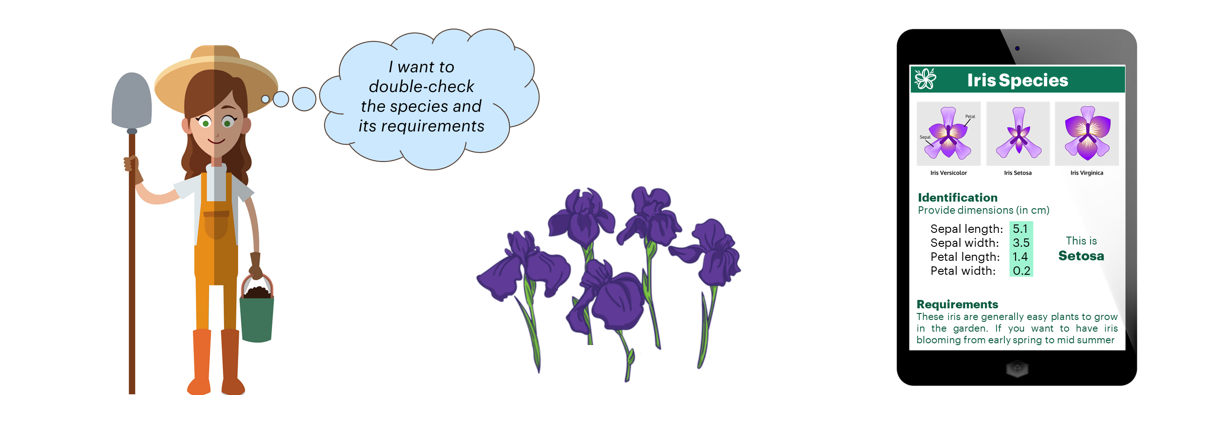

### The core of the application is a machine learning model, that based on dimensions of a sepal and a petal predicts Iris species: **setosa, versicolor, virginica**

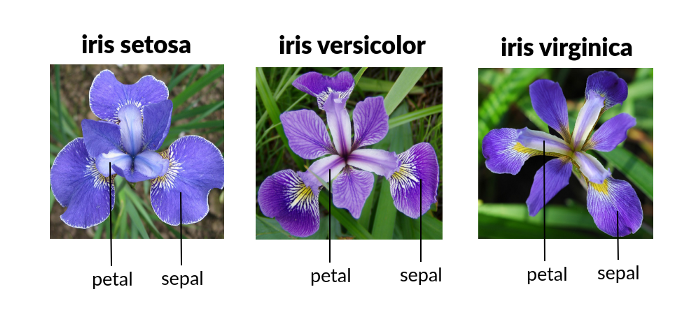

## Classification model for Iris species

In [47]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [9]:
# import some data to play with
iris = datasets.load_iris(as_frame=True)

### Model training

In [10]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [11]:
X = iris.frame.drop(['target'], axis=1)
y = iris.frame['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [28]:
knn_neighbours = 5

knn = KNeighborsClassifier(n_neighbors=knn_neighbours)
knn.fit(X_train, y_train)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

train_knn_accuracy = metrics.accuracy_score(y_train, y_pred_knn_train)
test_knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn_test)

print(train_knn_accuracy)
print(test_knn_accuracy)

0.9809523809523809
0.9555555555555556


In [32]:
model_name_knn = "irisClassification_knn"

with mlflow.start_run() as run:
  run_num = run.info.run_id
  model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_num, artifact_path=model_name)

# Log tags
  mlflow.set_tag('modelType', 'KNN')

# Log parameters of model - model parameters
  mlflow.log_param("neighbours", knn_neighbours)

# Log metrics - performance metrics
  mlflow.log_metric('accuracy_train', train_knn_accuracy)
  mlflow.log_metric('accuracy_test', test_knn_accuracy)

# Log model 
  mlflow.sklearn.log_model(knn, model_name_knn)

  model_details = mlflow.register_model(
    model_uri=model_uri,
    name=model_name_knn)

mlflow.end_run()


Registered model 'irisClassification_knn' already exists. Creating a new version of this model...
2023/02/20 18:20:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: irisClassification_knn, version 5
Created version '5' of model 'irisClassification_knn'.


In [33]:
# Model parameters
penaltyType = 'l2'
regularizationStrength = 10

logreg = LogisticRegression(penalty=penaltyType, C=regularizationStrength)
logreg.fit(X_train, y_train)

y_pred_logreg_train = logreg.predict(X_train)
y_pred_logreg_test = logreg.predict(X_test)

train_logreg_accuracy = metrics.accuracy_score(y_train, y_pred_logreg_train)
test_logreg_accuracy = metrics.accuracy_score(y_test, y_pred_logreg_test)

print(train_logreg_accuracy)
print(test_logreg_accuracy)

0.9904761904761905
0.9555555555555556


In [40]:
model_name_logreg = "irisClassification_logreg"

with mlflow.start_run() as run:
  run_num = run.info.run_id
  model_uri = "runs:/{run_id}/{artifact_path}".format(run_id=run_num, artifact_path=model_name)

# Log tags
  mlflow.set_tag('modelType', 'LogisticRegression')

# Log parameters of model - model parameters
  mlflow.log_param("penaltyType", penaltyType)
  mlflow.log_param("regularizationStrength", regularizationStrength)

# Log metrics - performance metrics
  mlflow.log_metric('accuracy_train', train_logreg_accuracy)
  mlflow.log_metric('accuracy_test', test_logreg_accuracy)

# Log model 
  mlflow.sklearn.log_model(logreg, model_name_logreg)

  model_details = mlflow.register_model(
    model_uri=model_uri,
    name=model_name_logreg)

mlflow.end_run()


Registered model 'irisClassification_logreg' already exists. Creating a new version of this model...
2023/02/20 18:29:39 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: irisClassification_logreg, version 3
Created version '3' of model 'irisClassification_logreg'.


# Print logged data

In [36]:
def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

In [37]:
print_auto_logged_info(mlflow.get_run(run_id=run_num))

run_id: 5b020c72c1d642cfa0d1150c8371fa3d
artifacts: []
params: {'modelType': 'LogisticRegression', 'penaltyType': 'l2', 'regularizationStrength': '10'}
metrics: {'accuracy_train': 0.9904761904761905, 'accuracy_test': 0.9555555555555556}
tags: {}


# MLFlow - load model

In [41]:
import mlflow.pyfunc

loaded_model_name = "irisClassification_logreg"
loaded_run_id = '5b020c72c1d642cfa0d1150c8371fa3d'

loaded_model = mlflow.pyfunc.load_model(
    model_uri=f"runs:/{loaded_run_id}/{loaded_model_name}"
)

# Predict from loaded model

In [48]:
predictionsFromLoadedModel = loaded_model.predict(np.array([4.300000,2.000000,1.000000,0.100000]).reshape(1, -1))


In [49]:
predictionsFromLoadedModel

array([0])

## Model persistence (saving)

Format:
* Joblib
* Pickle
* PMML (Predictive Model Markup Language)
* ONNX (Open Neural Network Exchange)
* deep learning framework-specific

Links:
* Joblib and Pickle: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
* PMML: https://pypi.org/project/sklearn-pmml-model/
* ONNX: https://onnx.ai/, https://pytorch.org/tutorials/advanced/super_resolution_with_onnxruntime.html 
* DL framework-specific: https://pytorch.org/tutorials/beginner/saving_loading_models.html, https://www.tensorflow.org/tutorials/keras/save_and_load 

In [29]:
from joblib import dump, load
dump(logreg, 'iris_model.joblib')

['iris_model.joblib']